In [489]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [490]:
df = pd.read_csv(r"C:\Users\batuh\OneDrive\Masaüstü\BATU_PROJECTS\FINAL_SPINNY_900.csv")

In [491]:
def check_df(dataframe, head = 10):
    print("################# SHAPE ###############")
    print(dataframe.shape)
    print("################ TYPES ################")
    print(dataframe.dtypes)
    print("################ TAİL ##################")
    print(dataframe.tail(head))
    print("################ NA ###################")
    print(dataframe.isnull().sum())
    print("################ Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [492]:
check_df(df)

################# SHAPE ###############
(976, 20)
################ TYPES ################
Car_Name                  object
Make                      object
Model                     object
Make_Year                  int64
Color                     object
Body_Type                 object
Mileage_Run               object
No_of_Owners              object
Seating_Capacity           int64
Fuel_Type                 object
Fuel_Tank_Capacity(L)      int64
Engine_Type               object
CC_Displacement            int64
Transmission              object
Transmission_Type         object
Power(BHP)               float64
Torque(Nm)               float64
Mileage(kmpl)             object
Emission                  object
Price                     object
dtype: object
################ TAİL ##################
                                             Car_Name           Make      Model  Make_Year   Color  Body_Type Mileage_Run No_of_Owners  Seating_Capacity Fuel_Type  Fuel_Tank_Capacity(L)          

In [493]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [494]:
def cleaning_data(df):
    for col in df.loc[:, df.dtypes == "object"]:
        df[col].fillna("Empty Values", inplace = True)
    
    for col in df.loc[:, df.dtypes == "int64"]:
        df[col].fillna(0, inplace = True)

    for col in df.loc[:, df.dtypes == "float64"]:
        df[col].fillna(0, inplace = True)
  
    for col in df.loc[:, df.dtypes == "object"]:
        df[col] = df[col].str.strip()
    
    for col in df.loc[:, df.dtypes == "category"]:
        df[col] = df[col].str.strip()
    

In [495]:
cleaning_data(df)

In [496]:
def arrange_the_data(df):
    df.columns = [col.upper() for col in df.columns]

    for col in df.loc[:, df.dtypes == "object"]:
        df[col] = df[col].str.upper()

    for col in df.loc[:, df.dtypes == "category"]:
        df[col] = df[col].str.upper()

In [497]:
arrange_the_data(df)

In [498]:
df.head()

,CAR_NAME,MAKE,MODEL,MAKE_YEAR,COLOR,BODY_TYPE,MILEAGE_RUN,NO_OF_OWNERS,SEATING_CAPACITY,FUEL_TYPE,FUEL_TANK_CAPACITY(L),ENGINE_TYPE,CC_DISPLACEMENT,TRANSMISSION,TRANSMISSION_TYPE,POWER(BHP),TORQUE(NM),MILEAGE(KMPL),EMISSION,PRICE
0,VOLKSWAGEN AMEO [2016-2017] HIGHLINE 1.5L AT (D),VOLKSWAGEN,AMEO,2017,SILVER,SEDAN,"44,611",1ST,5,DIESEL,45,1.5L TDI ENGINE,1498,7-SPEED,AUTOMATIC,109.00,250.00,21.66,BS IV,"6,57,000"
1,HYUNDAI I20 ACTIVE [2015-2020] 1.2 SX,HYUNDAI,I20 ACTIVE,2016,RED,CROSSOVER,"20,305",1ST,5,PETROL,45,1.2L KAPPA 5 SPEED MANUAL TRANSMISSION,1197,5-SPEED,MANUAL,82.00,115.00,17.19,BS V,"6,82,000"
2,HONDA WR-V VX I-VTEC,HONDA,WR-V,2019,WHITE,SUV,"29,540",2ND,5,PETROL,40,I-VTEC PETROL ENGINE,1199,5-SPEED,MANUAL,88.50,110.00,16.5,BS IV,"7,93,000"
3,RENAULT KWID 1.0 RXT AMT,RENAULT,KWID,2017,BRONZE,HATCHBACK,"35,680",1ST,5,PETROL,28,1.0L,999,5-SPEED,MANUAL,67.00,91.00,21.7,BS IV,"4,14,000"
4,HYUNDAI GRAND I10 [2017-2020] ASTA 1.2 KAPPA VTVT,HYUNDAI,GRAND I10,2017,ORANGE,HATCHBACK,"25,126",1ST,5,PETROL,43,KAPPA VTVT PETROL ENGINE,1197,5-SPEED,MANUAL,81.86,113.75,18.9,BS V,"5,15,000"


In [499]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object","category"] and df[col].nunique() < 24]
num_cols = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 12 and str(df[col].dtypes) in ["int64","float64"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 24 and str(df[col].dtypes) in [["object","category"]]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [500]:
df[cat_cols]

,MAKE,COLOR,BODY_TYPE,NO_OF_OWNERS,FUEL_TYPE,TRANSMISSION,TRANSMISSION_TYPE,EMISSION,SEATING_CAPACITY
0,VOLKSWAGEN,SILVER,SEDAN,1ST,DIESEL,7-SPEED,AUTOMATIC,BS IV,5
1,HYUNDAI,RED,CROSSOVER,1ST,PETROL,5-SPEED,MANUAL,BS V,5
2,HONDA,WHITE,SUV,2ND,PETROL,5-SPEED,MANUAL,BS IV,5
3,RENAULT,BRONZE,HATCHBACK,1ST,PETROL,5-SPEED,MANUAL,BS IV,5
4,HYUNDAI,ORANGE,HATCHBACK,1ST,PETROL,5-SPEED,MANUAL,BS V,5
5,HYUNDAI,RED,HATCHBACK,1ST,PETROL,5-SPEED,MANUAL,BS IV,5
6,HONDA,GREY,HATCHBACK,2ND,PETROL,5-SPEED,MANUAL,BS III,5
7,TATA,GREY,SUV,1ST,DIESEL,6-SPEED,AUTOMATIC,BS IV,5
8,HYUNDAI,BLUE,HATCHBACK,1ST,PETROL,5-SPEED,MANUAL,BS IV,5
9,RENAULT,BRONZE,HATCHBACK,2ND,PETROL,5-SPEED,MANUAL,BS IV,5


In [501]:
def graphs_for_category(df):
    for col in cat_cols:
        print("#####################")
        plt.grid(True)
        plt.xlabel("Toplam Sayı")
        sns.countplot(y = col, data = df)
        plt.title(col)
        plt.show()
        print("################# DEĞERLER #####################")
        print(df[col].value_counts())
        print("##################  YÜZDELİK ORANLAR  ##################")
        print(df[col].value_counts() * 100 / len(df))

#####################


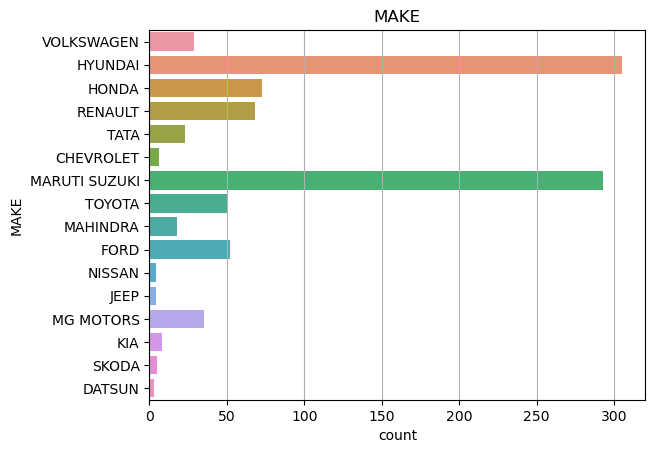

################# DEĞERLER #####################
HYUNDAI          305
MARUTI SUZUKI    293
HONDA             73
RENAULT           68
FORD              52
TOYOTA            50
MG MOTORS         35
VOLKSWAGEN        29
TATA              23
MAHINDRA          18
KIA                8
CHEVROLET          6
SKODA              5
NISSAN             4
JEEP               4
DATSUN             3
Name: MAKE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
HYUNDAI          31.250000
MARUTI SUZUKI    30.020492
HONDA             7.479508
RENAULT           6.967213
FORD              5.327869
TOYOTA            5.122951
MG MOTORS         3.586066
VOLKSWAGEN        2.971311
TATA              2.356557
MAHINDRA          1.844262
KIA               0.819672
CHEVROLET         0.614754
SKODA             0.512295
NISSAN            0.409836
JEEP              0.409836
DATSUN            0.307377
Name: MAKE, dtype: float64
#####################


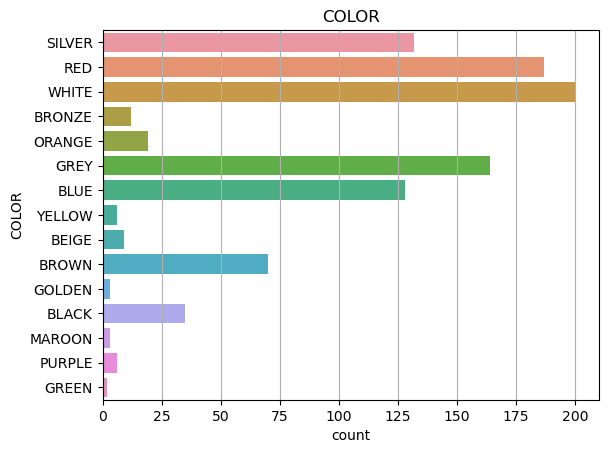

################# DEĞERLER #####################
WHITE     200
RED       187
GREY      164
SILVER    132
BLUE      128
BROWN      70
BLACK      35
ORANGE     19
BRONZE     12
BEIGE       9
YELLOW      6
PURPLE      6
GOLDEN      3
MAROON      3
GREEN       2
Name: COLOR, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
WHITE     20.491803
RED       19.159836
GREY      16.803279
SILVER    13.524590
BLUE      13.114754
BROWN      7.172131
BLACK      3.586066
ORANGE     1.946721
BRONZE     1.229508
BEIGE      0.922131
YELLOW     0.614754
PURPLE     0.614754
GOLDEN     0.307377
MAROON     0.307377
GREEN      0.204918
Name: COLOR, dtype: float64
#####################


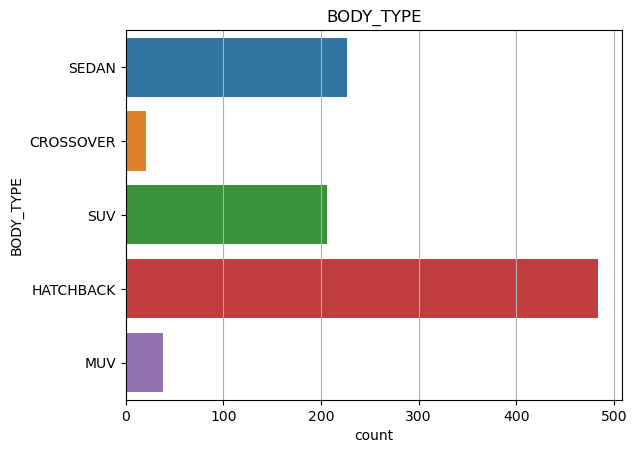

################# DEĞERLER #####################
HATCHBACK    484
SEDAN        227
SUV          206
MUV           38
CROSSOVER     21
Name: BODY_TYPE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
HATCHBACK    49.590164
SEDAN        23.258197
SUV          21.106557
MUV           3.893443
CROSSOVER     2.151639
Name: BODY_TYPE, dtype: float64
#####################


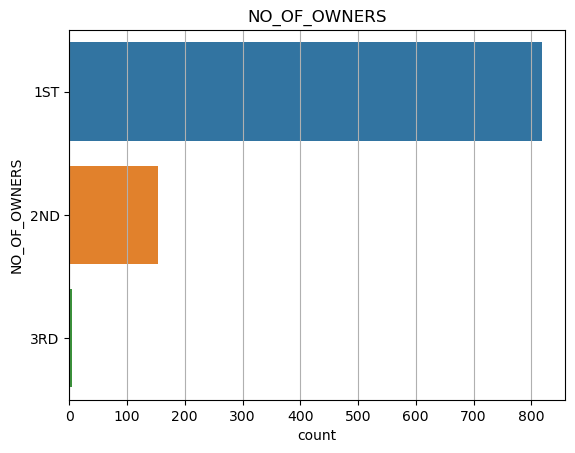

################# DEĞERLER #####################
1ST    818
2ND    154
3RD      4
Name: NO_OF_OWNERS, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
1ST    83.811475
2ND    15.778689
3RD     0.409836
Name: NO_OF_OWNERS, dtype: float64
#####################


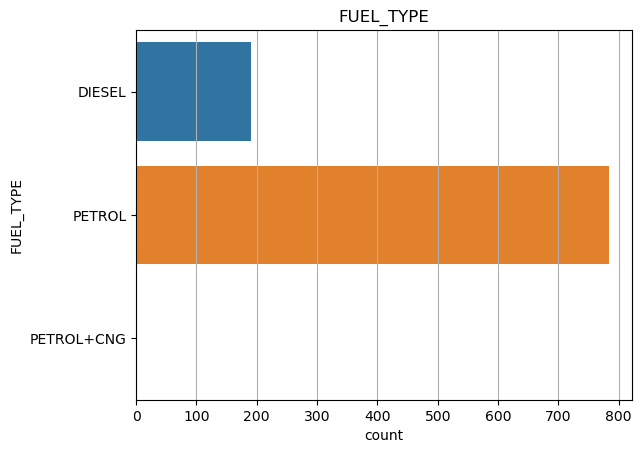

################# DEĞERLER #####################
PETROL        783
DIESEL        191
PETROL+CNG      2
Name: FUEL_TYPE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
PETROL        80.225410
DIESEL        19.569672
PETROL+CNG     0.204918
Name: FUEL_TYPE, dtype: float64
#####################


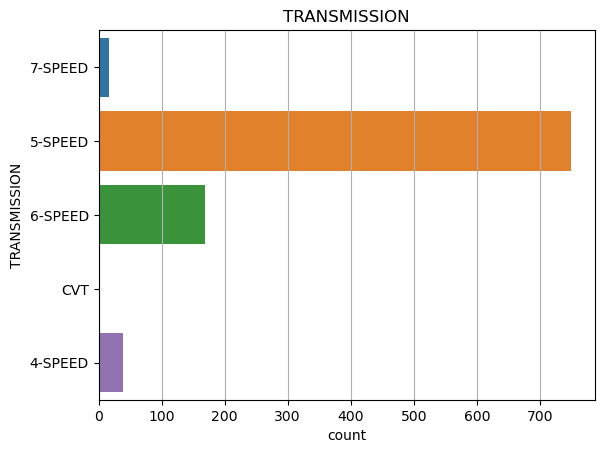

################# DEĞERLER #####################
5-SPEED    749
6-SPEED    169
4-SPEED     39
7-SPEED     16
CVT          3
Name: TRANSMISSION, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
5-SPEED    76.741803
6-SPEED    17.315574
4-SPEED     3.995902
7-SPEED     1.639344
CVT         0.307377
Name: TRANSMISSION, dtype: float64
#####################


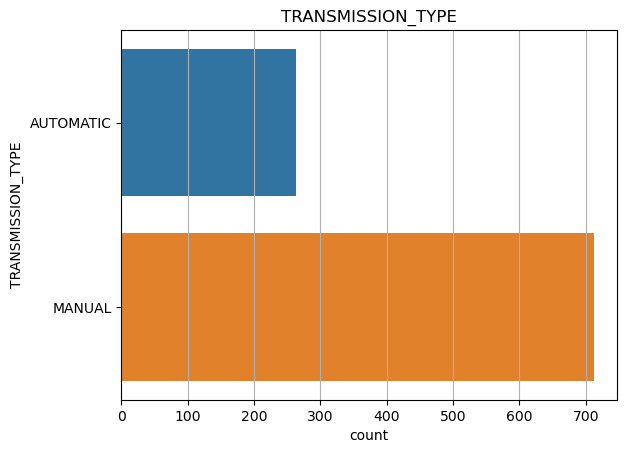

################# DEĞERLER #####################
MANUAL       712
AUTOMATIC    264
Name: TRANSMISSION_TYPE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
MANUAL       72.95082
AUTOMATIC    27.04918
Name: TRANSMISSION_TYPE, dtype: float64
#####################


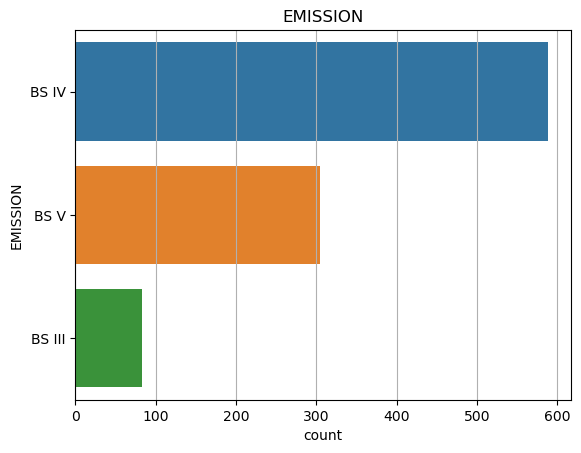

################# DEĞERLER #####################
BS IV     588
BS V      305
BS III     83
Name: EMISSION, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
BS IV     60.245902
BS V      31.250000
BS III     8.504098
Name: EMISSION, dtype: float64
#####################


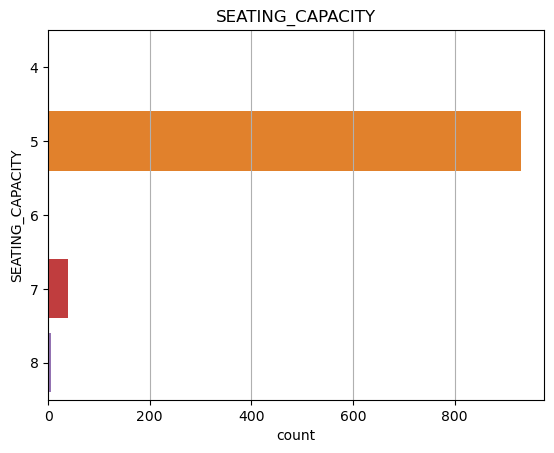

################# DEĞERLER #####################
5    930
7     39
8      5
6      1
4      1
Name: SEATING_CAPACITY, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
5    95.286885
7     3.995902
8     0.512295
6     0.102459
4     0.102459
Name: SEATING_CAPACITY, dtype: float64


In [502]:
graphs_for_category(df)

In [503]:
def graphs_for_numeric(df):
    for col in num_cols:
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(df[col].describe().T)
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        plt.grid(True)
        plt.hist(df[col])
        plt.title(col)
        plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count     976.000000
mean     2016.963115
std         2.818742
min      2011.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2022.000000
Name: MAKE_YEAR, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


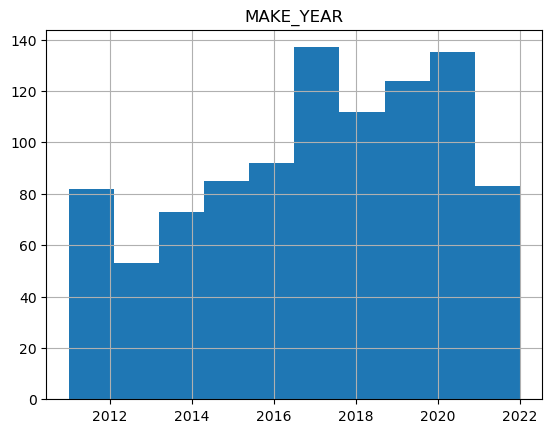

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    976.000000
mean       5.095287
std        0.446224
min        4.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        8.000000
Name: SEATING_CAPACITY, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


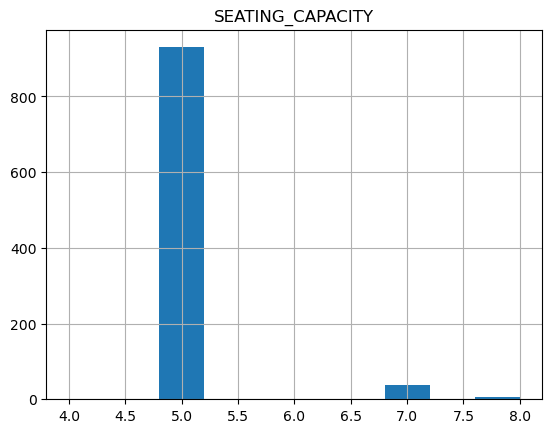

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    976.000000
mean      42.283811
std        8.074549
min       15.000000
25%       37.000000
50%       42.000000
75%       45.000000
max       70.000000
Name: FUEL_TANK_CAPACITY(L), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


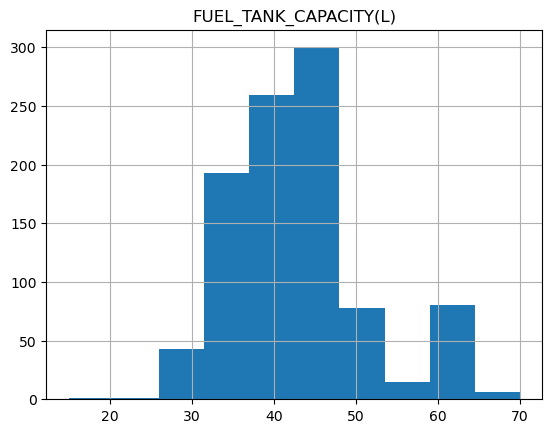

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count     976.000000
mean     1301.155738
std       276.867533
min       624.000000
25%      1197.000000
50%      1198.000000
75%      1497.000000
max      2179.000000
Name: CC_DISPLACEMENT, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


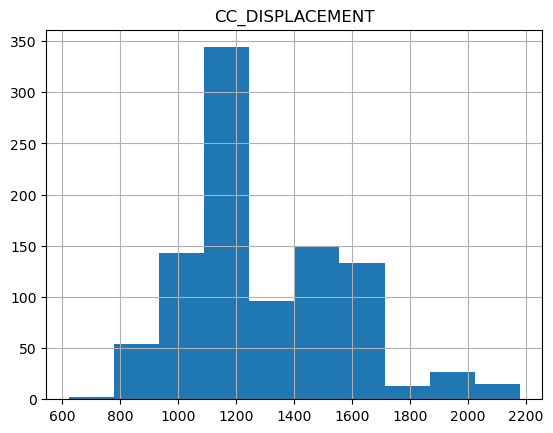

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    976.000000
mean      91.325758
std       25.713275
min       34.000000
25%       74.720000
50%       83.325000
75%      105.940000
max      177.000000
Name: POWER(BHP), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


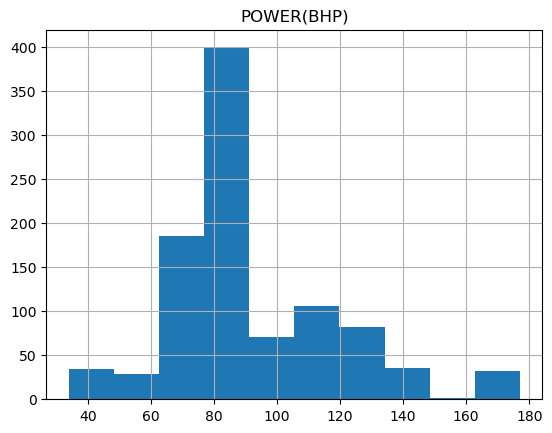

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    976.000000
mean     144.381045
std       66.780511
min       48.000000
25%      110.000000
50%      114.000000
75%      158.000000
max      380.000000
Name: TORQUE(NM), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


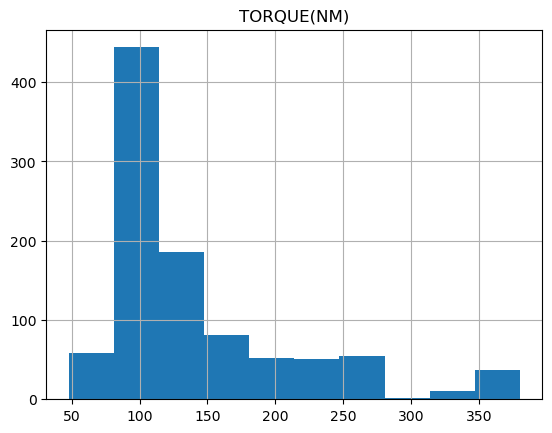

In [504]:
graphs_for_numeric(df)

In [505]:
def graps_for_correlasion(df, target):
    for col in num_cols:
        plt.grid(True)
        sns.regplot(x = df[col], y = df[target], data = df)
        plt.title(df[col].corr(df[target]))
        plt.show()

In [506]:
df["PRICE"] = df["PRICE"].str.replace(",","", regex= True)
df["PRICE"] = df["PRICE"].astype("int64")

In [507]:
df["PRICE"] = (df["PRICE"] / 1000)

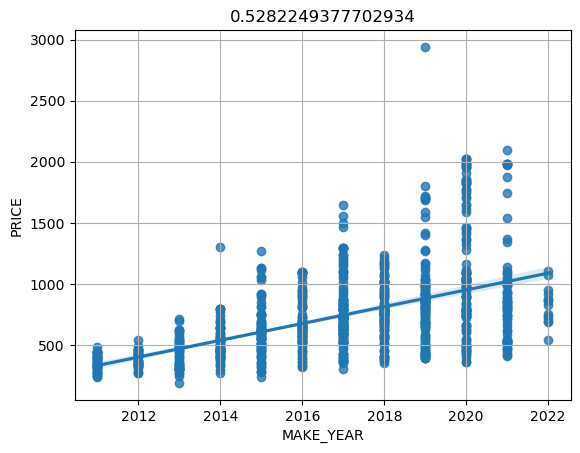

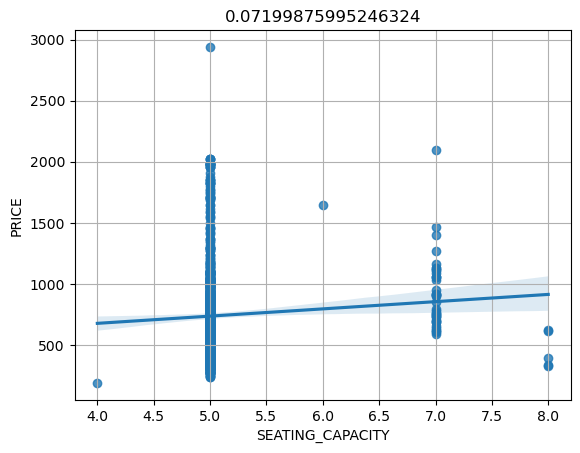

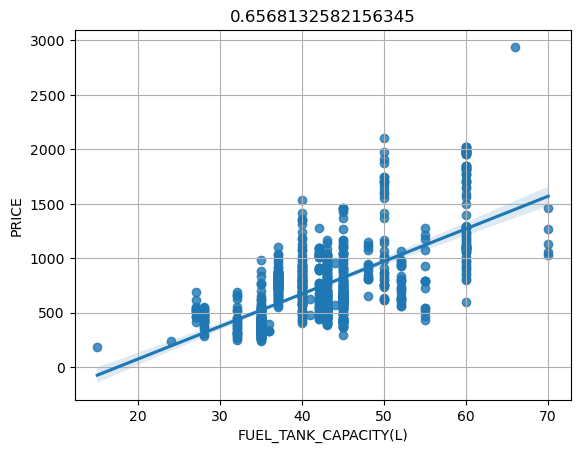

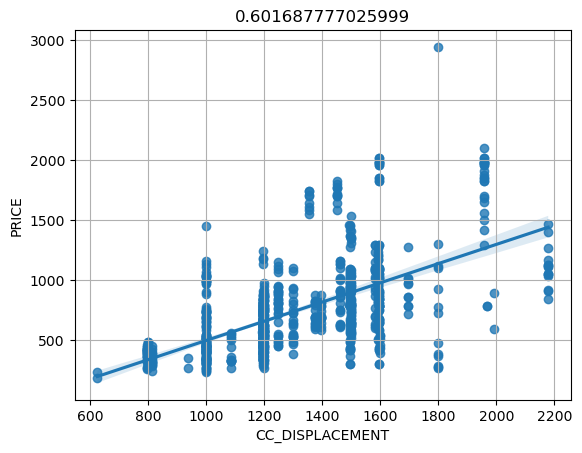

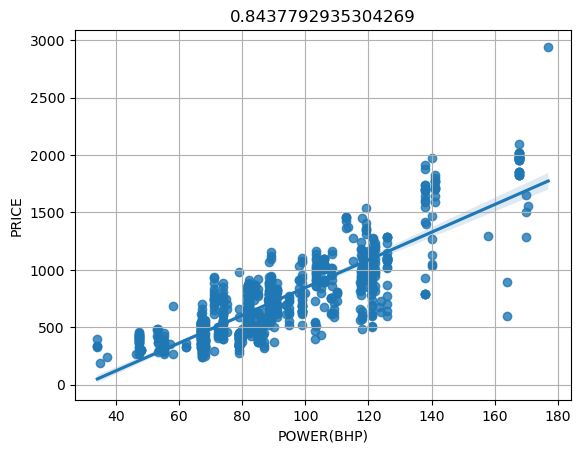

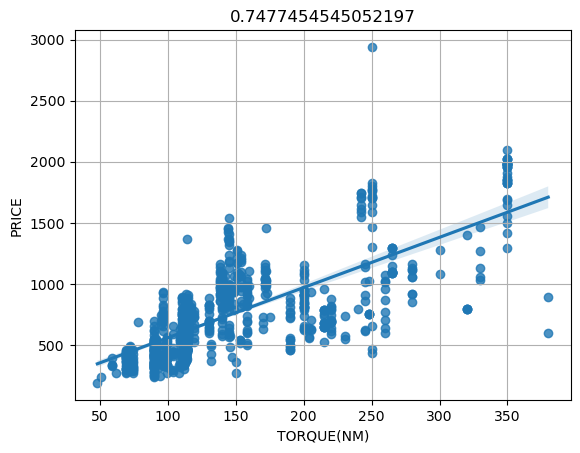

In [508]:
graps_for_correlasion(df, target= "PRICE")

In [509]:
def groups (df, target):
    for col in num_cols:
        print(df.pivot_table(target, col, aggfunc= ["count","mean","std"], sort = False))
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [510]:
groups(df, target= "PRICE")

          count         mean         std
          PRICE        PRICE       PRICE
MAKE_YEAR                               
2017        137   751.788321  269.090665
2016         92   687.152174  204.629708
2019        124   848.443548  379.988731
2012         38   388.631579   64.930491
2021         69   916.942029  444.929006
2020        135  1086.296296  498.480064
2013         53   432.377358  123.975684
2022         14   829.357143  155.133494
2018        112   772.642857  212.874698
2014         73   524.301370  155.612114
2011         44   354.181818   63.274328
2015         85   614.200000  214.114722
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                 count         mean         std
                 PRICE        PRICE       PRICE
SEATING_CAPACITY                               
5                  930   734.483871  367.204741
7                   39   923.948718  296.371206
8                    5   459.800000  148.656315
6 

In [511]:
df.head(5)

,CAR_NAME,MAKE,MODEL,MAKE_YEAR,COLOR,BODY_TYPE,MILEAGE_RUN,NO_OF_OWNERS,SEATING_CAPACITY,FUEL_TYPE,FUEL_TANK_CAPACITY(L),ENGINE_TYPE,CC_DISPLACEMENT,TRANSMISSION,TRANSMISSION_TYPE,POWER(BHP),TORQUE(NM),MILEAGE(KMPL),EMISSION,PRICE
0,VOLKSWAGEN AMEO [2016-2017] HIGHLINE 1.5L AT (D),VOLKSWAGEN,AMEO,2017,SILVER,SEDAN,"44,611",1ST,5,DIESEL,45,1.5L TDI ENGINE,1498,7-SPEED,AUTOMATIC,109.00,250.00,21.66,BS IV,657.0
1,HYUNDAI I20 ACTIVE [2015-2020] 1.2 SX,HYUNDAI,I20 ACTIVE,2016,RED,CROSSOVER,"20,305",1ST,5,PETROL,45,1.2L KAPPA 5 SPEED MANUAL TRANSMISSION,1197,5-SPEED,MANUAL,82.00,115.00,17.19,BS V,682.0
2,HONDA WR-V VX I-VTEC,HONDA,WR-V,2019,WHITE,SUV,"29,540",2ND,5,PETROL,40,I-VTEC PETROL ENGINE,1199,5-SPEED,MANUAL,88.50,110.00,16.5,BS IV,793.0
3,RENAULT KWID 1.0 RXT AMT,RENAULT,KWID,2017,BRONZE,HATCHBACK,"35,680",1ST,5,PETROL,28,1.0L,999,5-SPEED,MANUAL,67.00,91.00,21.7,BS IV,414.0
4,HYUNDAI GRAND I10 [2017-2020] ASTA 1.2 KAPPA VTVT,HYUNDAI,GRAND I10,2017,ORANGE,HATCHBACK,"25,126",1ST,5,PETROL,43,KAPPA VTVT PETROL ENGINE,1197,5-SPEED,MANUAL,81.86,113.75,18.9,BS V,515.0


In [512]:
df.nunique()

CAR_NAME                 376
MAKE                      16
MODEL                     87
MAKE_YEAR                 12
COLOR                     15
BODY_TYPE                  5
MILEAGE_RUN              878
NO_OF_OWNERS               3
SEATING_CAPACITY           5
FUEL_TYPE                  3
FUEL_TANK_CAPACITY(L)     21
ENGINE_TYPE              131
CC_DISPLACEMENT           38
TRANSMISSION               5
TRANSMISSION_TYPE          2
POWER(BHP)               105
TORQUE(NM)                79
MILEAGE(KMPL)            158
EMISSION                   3
PRICE                    585
dtype: int64

In [513]:
def graphs_for_category_wiht_hue(df, hue):
    for col in cat_cols:
        print("#####################")
        plt.grid(True)
        plt.xlabel("Toplam Sayı")
        sns.countplot(y = col, hue = hue, data = df)
        plt.title(col)
        plt.show()
        print("################# DEĞERLER #####################")
        print(df[col].value_counts())
        print("##################  YÜZDELİK ORANLAR  ##################")
        print(df[col].value_counts() * 100 / len(df))

#####################


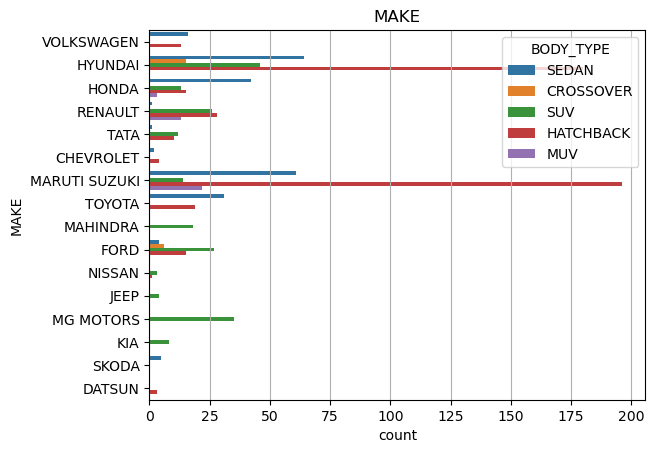

################# DEĞERLER #####################
HYUNDAI          305
MARUTI SUZUKI    293
HONDA             73
RENAULT           68
FORD              52
TOYOTA            50
MG MOTORS         35
VOLKSWAGEN        29
TATA              23
MAHINDRA          18
KIA                8
CHEVROLET          6
SKODA              5
NISSAN             4
JEEP               4
DATSUN             3
Name: MAKE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
HYUNDAI          31.250000
MARUTI SUZUKI    30.020492
HONDA             7.479508
RENAULT           6.967213
FORD              5.327869
TOYOTA            5.122951
MG MOTORS         3.586066
VOLKSWAGEN        2.971311
TATA              2.356557
MAHINDRA          1.844262
KIA               0.819672
CHEVROLET         0.614754
SKODA             0.512295
NISSAN            0.409836
JEEP              0.409836
DATSUN            0.307377
Name: MAKE, dtype: float64
#####################


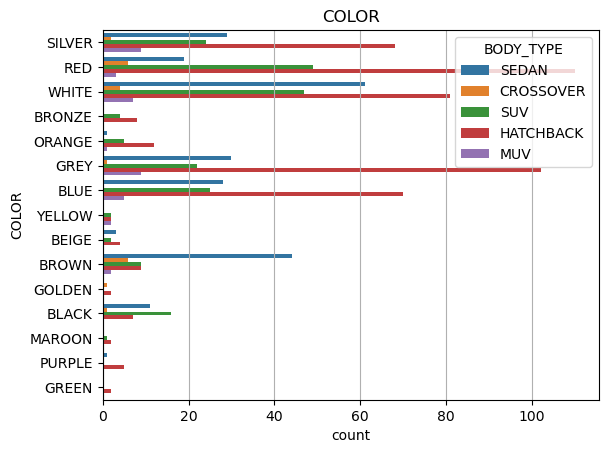

################# DEĞERLER #####################
WHITE     200
RED       187
GREY      164
SILVER    132
BLUE      128
BROWN      70
BLACK      35
ORANGE     19
BRONZE     12
BEIGE       9
YELLOW      6
PURPLE      6
GOLDEN      3
MAROON      3
GREEN       2
Name: COLOR, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
WHITE     20.491803
RED       19.159836
GREY      16.803279
SILVER    13.524590
BLUE      13.114754
BROWN      7.172131
BLACK      3.586066
ORANGE     1.946721
BRONZE     1.229508
BEIGE      0.922131
YELLOW     0.614754
PURPLE     0.614754
GOLDEN     0.307377
MAROON     0.307377
GREEN      0.204918
Name: COLOR, dtype: float64
#####################


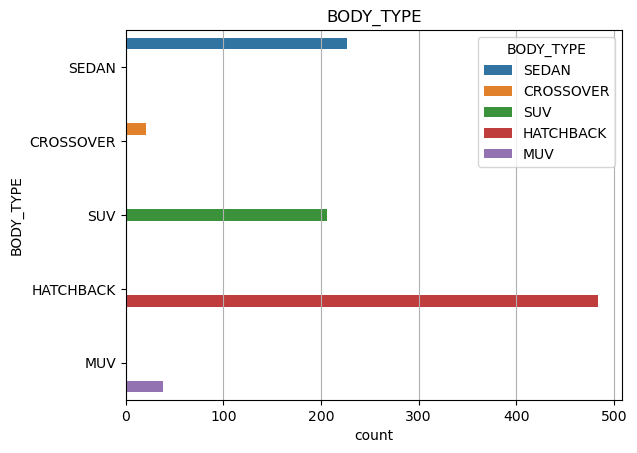

################# DEĞERLER #####################
HATCHBACK    484
SEDAN        227
SUV          206
MUV           38
CROSSOVER     21
Name: BODY_TYPE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
HATCHBACK    49.590164
SEDAN        23.258197
SUV          21.106557
MUV           3.893443
CROSSOVER     2.151639
Name: BODY_TYPE, dtype: float64
#####################


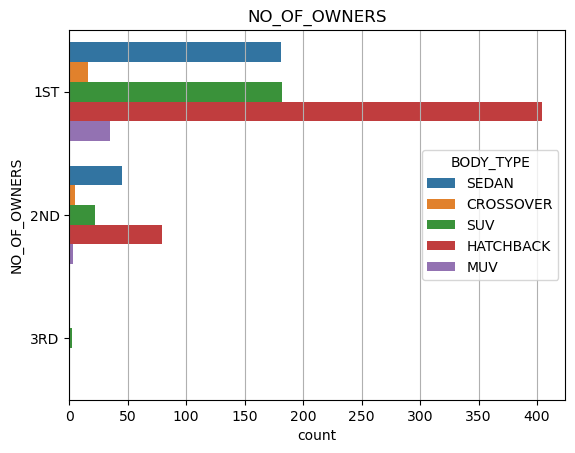

################# DEĞERLER #####################
1ST    818
2ND    154
3RD      4
Name: NO_OF_OWNERS, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
1ST    83.811475
2ND    15.778689
3RD     0.409836
Name: NO_OF_OWNERS, dtype: float64
#####################


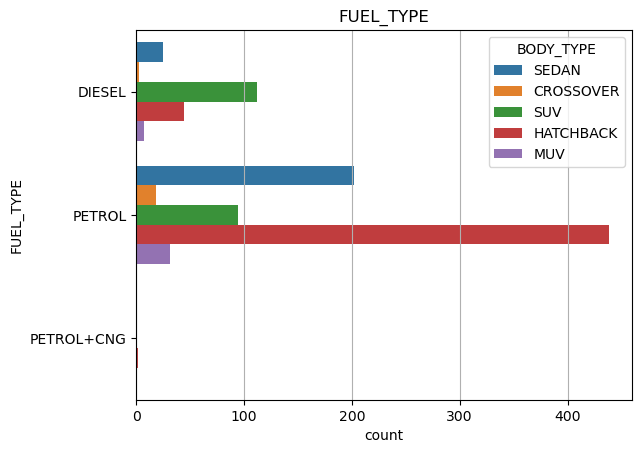

################# DEĞERLER #####################
PETROL        783
DIESEL        191
PETROL+CNG      2
Name: FUEL_TYPE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
PETROL        80.225410
DIESEL        19.569672
PETROL+CNG     0.204918
Name: FUEL_TYPE, dtype: float64
#####################


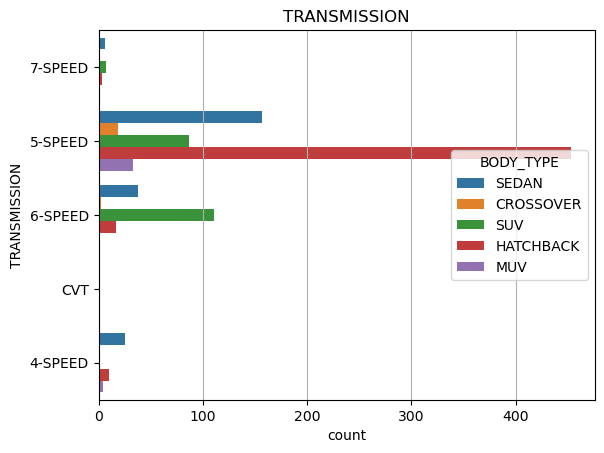

################# DEĞERLER #####################
5-SPEED    749
6-SPEED    169
4-SPEED     39
7-SPEED     16
CVT          3
Name: TRANSMISSION, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
5-SPEED    76.741803
6-SPEED    17.315574
4-SPEED     3.995902
7-SPEED     1.639344
CVT         0.307377
Name: TRANSMISSION, dtype: float64
#####################


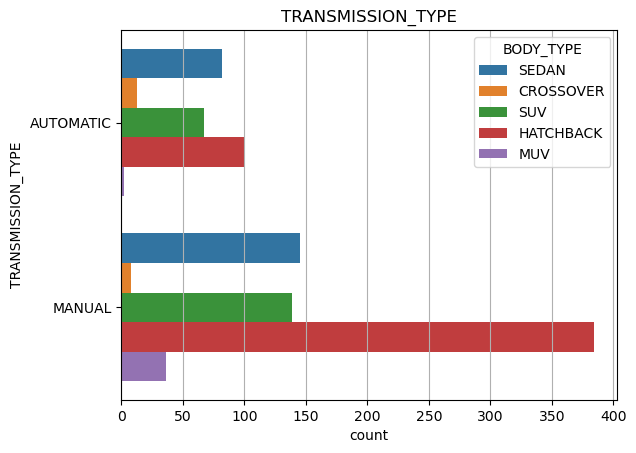

################# DEĞERLER #####################
MANUAL       712
AUTOMATIC    264
Name: TRANSMISSION_TYPE, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
MANUAL       72.95082
AUTOMATIC    27.04918
Name: TRANSMISSION_TYPE, dtype: float64
#####################


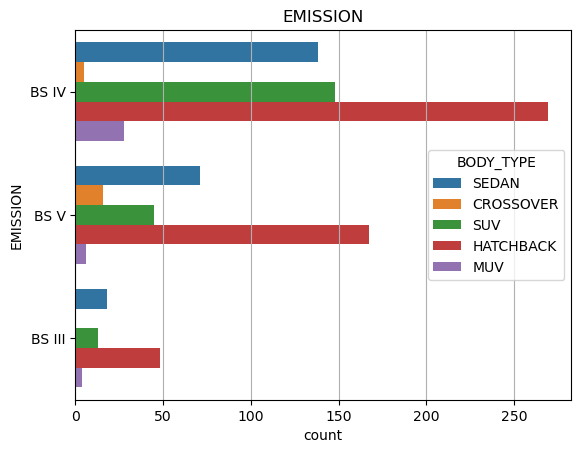

################# DEĞERLER #####################
BS IV     588
BS V      305
BS III     83
Name: EMISSION, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
BS IV     60.245902
BS V      31.250000
BS III     8.504098
Name: EMISSION, dtype: float64
#####################


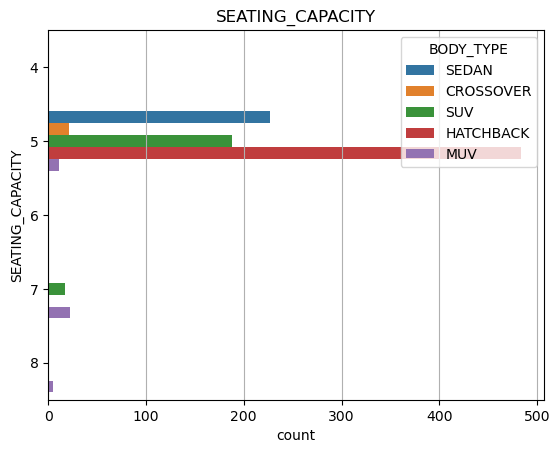

################# DEĞERLER #####################
5    930
7     39
8      5
6      1
4      1
Name: SEATING_CAPACITY, dtype: int64
##################  YÜZDELİK ORANLAR  ##################
5    95.286885
7     3.995902
8     0.512295
6     0.102459
4     0.102459
Name: SEATING_CAPACITY, dtype: float64


In [514]:
graphs_for_category_wiht_hue(df, hue = "BODY_TYPE")

In [515]:
def graps_for_pie(df):
    for col in df.loc[:,df.nunique() < 15]:
        freq = df[col].value_counts()
        fig = plt.figure()
        plt.figure(figsize = (10,6))
        c = (["red","green","purple","blue","orange","grey","pink","gold",
        "brown","yellow","black","white"])
        plt.pie(freq, labels = freq.index, autopct="%1.1f%%", colors = c, shadow = True)
        plt.title(col)
        plt.show()



<Figure size 640x480 with 0 Axes>

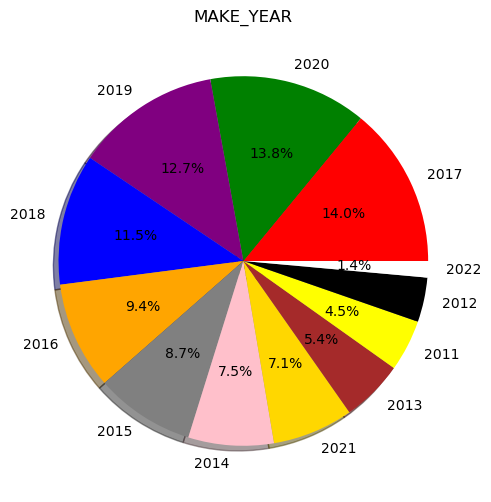

<Figure size 640x480 with 0 Axes>

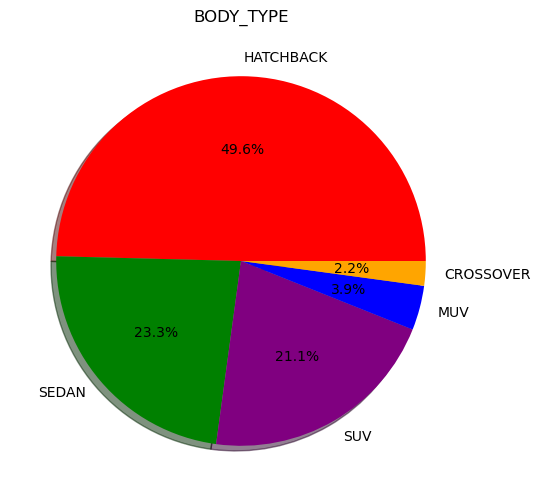

<Figure size 640x480 with 0 Axes>

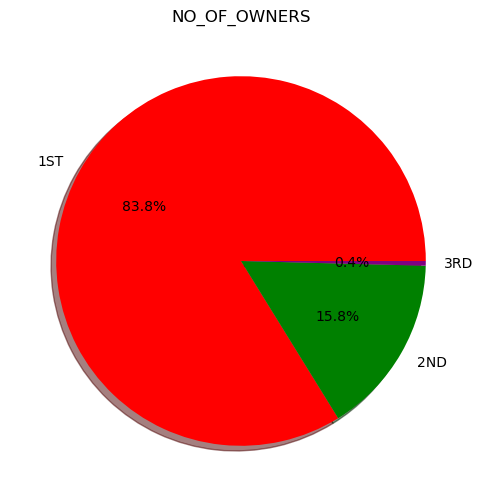

<Figure size 640x480 with 0 Axes>

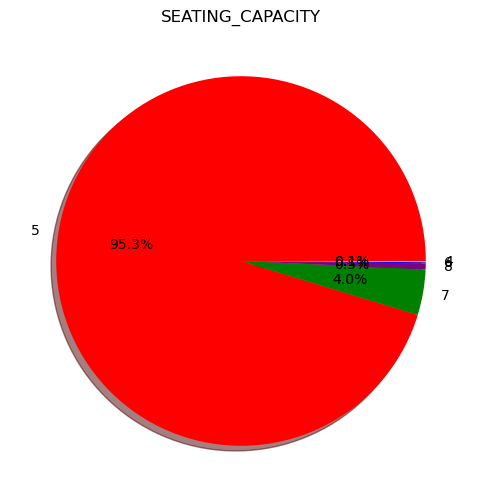

<Figure size 640x480 with 0 Axes>

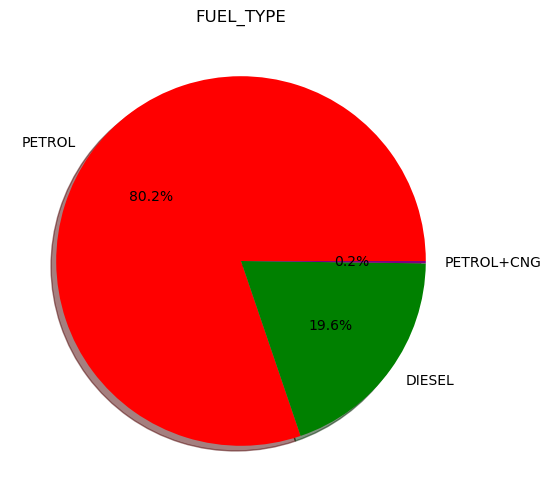

<Figure size 640x480 with 0 Axes>

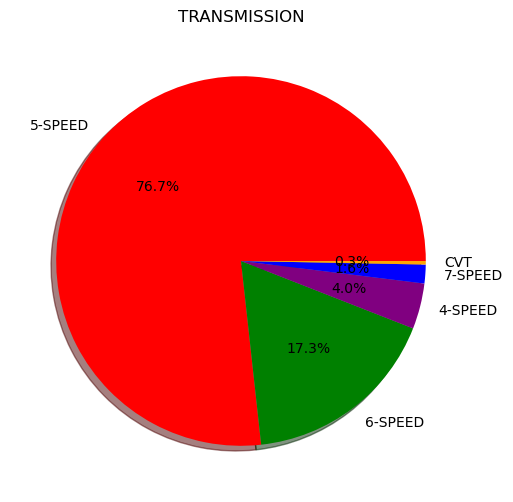

<Figure size 640x480 with 0 Axes>

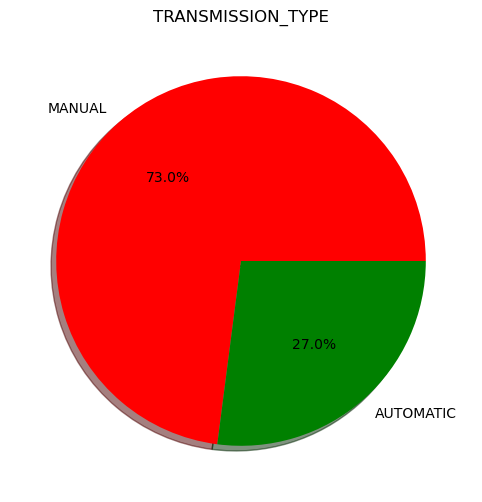

<Figure size 640x480 with 0 Axes>

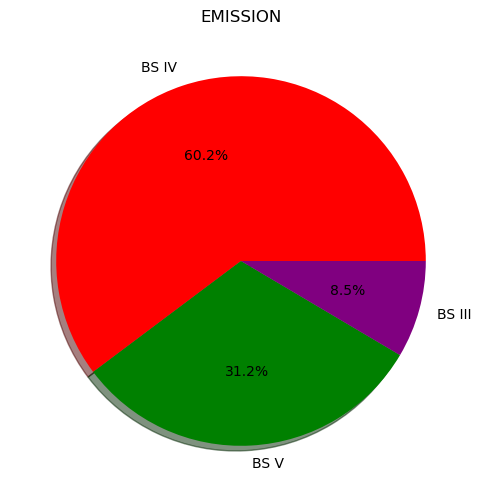

In [516]:
graps_for_pie(df)

In [517]:
df.head()

,CAR_NAME,MAKE,MODEL,MAKE_YEAR,COLOR,BODY_TYPE,MILEAGE_RUN,NO_OF_OWNERS,SEATING_CAPACITY,FUEL_TYPE,FUEL_TANK_CAPACITY(L),ENGINE_TYPE,CC_DISPLACEMENT,TRANSMISSION,TRANSMISSION_TYPE,POWER(BHP),TORQUE(NM),MILEAGE(KMPL),EMISSION,PRICE
0,VOLKSWAGEN AMEO [2016-2017] HIGHLINE 1.5L AT (D),VOLKSWAGEN,AMEO,2017,SILVER,SEDAN,"44,611",1ST,5,DIESEL,45,1.5L TDI ENGINE,1498,7-SPEED,AUTOMATIC,109.00,250.00,21.66,BS IV,657.0
1,HYUNDAI I20 ACTIVE [2015-2020] 1.2 SX,HYUNDAI,I20 ACTIVE,2016,RED,CROSSOVER,"20,305",1ST,5,PETROL,45,1.2L KAPPA 5 SPEED MANUAL TRANSMISSION,1197,5-SPEED,MANUAL,82.00,115.00,17.19,BS V,682.0
2,HONDA WR-V VX I-VTEC,HONDA,WR-V,2019,WHITE,SUV,"29,540",2ND,5,PETROL,40,I-VTEC PETROL ENGINE,1199,5-SPEED,MANUAL,88.50,110.00,16.5,BS IV,793.0
3,RENAULT KWID 1.0 RXT AMT,RENAULT,KWID,2017,BRONZE,HATCHBACK,"35,680",1ST,5,PETROL,28,1.0L,999,5-SPEED,MANUAL,67.00,91.00,21.7,BS IV,414.0
4,HYUNDAI GRAND I10 [2017-2020] ASTA 1.2 KAPPA VTVT,HYUNDAI,GRAND I10,2017,ORANGE,HATCHBACK,"25,126",1ST,5,PETROL,43,KAPPA VTVT PETROL ENGINE,1197,5-SPEED,MANUAL,81.86,113.75,18.9,BS V,515.0


In [518]:
def graphs_for_large_index (df, col, count):
    freq = df[col].value_counts().loc[lambda x : x > count]
    plt.grid(True)
    sns.barplot( y = freq.index, x = freq, data= df)
    plt.show()
    print("#####################################################################################")
    print(df[col].value_counts().loc[lambda x : x > count])
    print("#####################################################################################")
    rate = df[col].value_counts().loc[lambda x : x > count].sum()
    print(df[col].value_counts().loc[lambda x : x > count] * 100 / rate)

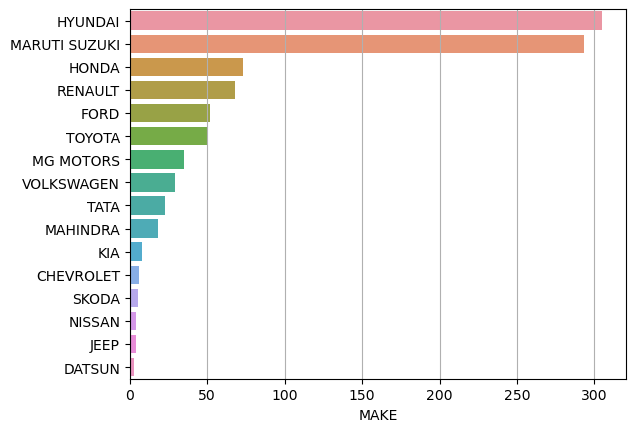

#####################################################################################
HYUNDAI          305
MARUTI SUZUKI    293
HONDA             73
RENAULT           68
FORD              52
TOYOTA            50
MG MOTORS         35
VOLKSWAGEN        29
TATA              23
MAHINDRA          18
KIA                8
CHEVROLET          6
SKODA              5
NISSAN             4
JEEP               4
DATSUN             3
Name: MAKE, dtype: int64
#####################################################################################
HYUNDAI          31.250000
MARUTI SUZUKI    30.020492
HONDA             7.479508
RENAULT           6.967213
FORD              5.327869
TOYOTA            5.122951
MG MOTORS         3.586066
VOLKSWAGEN        2.971311
TATA              2.356557
MAHINDRA          1.844262
KIA               0.819672
CHEVROLET         0.614754
SKODA             0.512295
NISSAN            0.409836
JEEP              0.409836
DATSUN            0.307377
Name: MAKE, dtype: float64


In [519]:
graphs_for_large_index(df= df, col= "MAKE", count= 0)

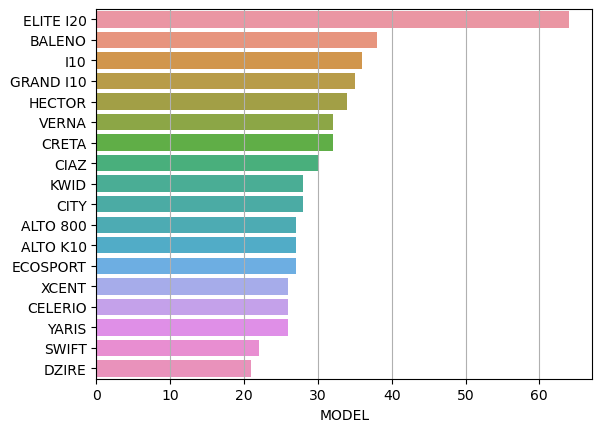

#####################################################################################
ELITE I20    64
BALENO       38
I10          36
GRAND I10    35
HECTOR       34
VERNA        32
CRETA        32
CIAZ         30
KWID         28
CITY         28
ALTO 800     27
ALTO K10     27
ECOSPORT     27
XCENT        26
CELERIO      26
YARIS        26
SWIFT        22
DZIRE        21
Name: MODEL, dtype: int64
#####################################################################################
ELITE I20    11.449016
BALENO        6.797853
I10           6.440072
GRAND I10     6.261181
HECTOR        6.082290
VERNA         5.724508
CRETA         5.724508
CIAZ          5.366726
KWID          5.008945
CITY          5.008945
ALTO 800      4.830054
ALTO K10      4.830054
ECOSPORT      4.830054
XCENT         4.651163
CELERIO       4.651163
YARIS         4.651163
SWIFT         3.935599
DZIRE         3.756708
Name: MODEL, dtype: float64


In [520]:
graphs_for_large_index(df= df, col= "MODEL", count= 20)

In [521]:
# dms = pd.get_dummies(df[["MODEL","CAR_NAME","MAKE","MAKE_YEAR","COLOR","BODY_TYPE","MILEAGE_RUN","NO_OF_OWNERS","FUEL_TYPE","ENGINE_TYPE","TRANSMISSION","TRANSMISSION_TYPE","POWER(BHP)","EMISSION"]])
# df = df.drop(["MODEL","CAR_NAME","MAKE","MAKE_YEAR","COLOR","BODY_TYPE","MILEAGE_RUN","NO_OF_OWNERS","FUEL_TYPE","ENGINE_TYPE","TRANSMISSION","TRANSMISSION_TYPE","POWER(BHP)","EMISSION"], axis = 1)
# df = pd.concat([df,dms], axis = 1)

## MAKİNE ÖĞRENMESİ

In [522]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [523]:
X = df.loc[:, df.columns != "PRICE"]
y = df[["PRICE"]]

In [524]:
for col in X:
    X[col] = le.fit_transform(X[col])


C:\Users\batuh\AppData\Local\Temp\ipykernel_190200\4187070900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


In [525]:
X.head()

,CAR_NAME,MAKE,MODEL,MAKE_YEAR,COLOR,BODY_TYPE,MILEAGE_RUN,NO_OF_OWNERS,SEATING_CAPACITY,FUEL_TYPE,FUEL_TANK_CAPACITY(L),ENGINE_TYPE,CC_DISPLACEMENT,TRANSMISSION,TRANSMISSION_TYPE,POWER(BHP),TORQUE(NM),MILEAGE(KMPL),EMISSION
0,360,15,6,6,12,3,462,0,1,0,13,42,25,3,0,74,70,119,1
1,112,4,40,5,11,0,136,0,1,1,13,22,11,1,1,38,31,42,2
2,59,3,81,8,13,4,275,1,1,1,8,86,13,1,1,49,22,30,1
3,306,11,45,6,3,1,354,0,1,1,3,5,6,1,1,14,9,120,1
4,101,4,33,6,9,1,208,0,1,1,11,103,11,1,1,37,28,70,2


In [528]:
from sklearn.preprocessing import StandardScaler

In [529]:
scale = StandardScaler()
scale.fit_transform(X)

array([[ 1.735792  ,  2.28491165, -1.22286411, ...,  1.70658549,
         1.01095258, -0.38680185],
       [-0.65729654, -0.79723579,  0.10787383, ..., -0.1606025 ,
        -0.95772249,  1.3137324 ],
       [-1.16872271, -1.07743101,  1.71258722, ..., -0.59149203,
        -1.264529  , -0.38680185],
       ...,
       [-0.40640822, -0.79723579,  1.51689046, ...,  0.74905319,
        -1.03442412, -2.0873361 ],
       [-1.44855968, -1.35762624, -0.28351968, ...,  1.27569595,
        -0.36967669,  1.3137324 ],
       [ 0.53924773,  0.3235451 ,  0.14701318, ..., -0.39998557,
         0.67857887,  1.3137324 ]])

In [530]:
from sklearn.linear_model import LinearRegression

In [531]:
model = LinearRegression()

In [532]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [534]:
model

LinearRegression()

In [535]:
model.fit(X_train, y_train)

LinearRegression()

In [536]:
from sklearn.metrics import mean_squared_error, r2_score

In [537]:
y_pred = model.predict(X_test)

In [538]:
np.sqrt(mean_squared_error(y_test,y_pred))   

151.5910925022068

In [539]:
model.score(X_test, y_test)

0.7999391408987255

In [540]:
y_test.head(20)

,PRICE
199,336.0
541,461.0
174,547.0
468,352.0
66,1742.0
493,788.0
884,669.0
599,728.0
888,1132.0
158,1290.0


In [541]:
y_test = y_test.reset_index()
y_test = y_test.drop(["index"],axis = 1)

In [542]:
y_pred = pd.DataFrame(data = y_pred)
header = ["PRED"]
y_pred.columns = header

In [543]:
result = pd.concat([y_test, y_pred], axis = 1)

In [544]:
result.head(30)

,PRICE,PRED
0,336.0,261.413614
1,461.0,478.467707
2,547.0,711.586288
3,352.0,279.912735
4,1742.0,1444.848718
5,788.0,826.056731
6,669.0,583.711388
7,728.0,847.161847
8,1132.0,900.872606
9,1290.0,1448.561115
